In [1]:
using StatisticalRethinking
gr(size=(300,300))

Turing.setadbackend(:reverse_diff)

ProjDir = @__DIR__
cd(ProjDir)

loaded


┌ Warning: Package Turing does not have CmdStan in its dependencies:
│ - If you have Turing checked out for development and have
│   added CmdStan as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Turing
│ Loading CmdStan into Turing from project dependency, future warnings for Turing are suppressed.
└ @ nothing nothing:840


### snippet 4.38

In [2]:
howell1 = CSV.read(joinpath(dirname(Base.pathof(StatisticalRethinking)), "..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [3]:
df2 = filter(row -> row[:age] >= 18, df);
y = df2[:height];
x = df2[:weight];

Define the regression model

In [4]:
@model line(y, x) = begin
    #priors
    alpha ~ Normal(178.0, 100.0)
    beta ~ Normal(0.0, 10.0)
    s ~ Uniform(0, 50)

    #model
    mu = alpha .+ beta*x
    for i in 1:length(y)
      y[i] ~ Normal(mu[i], s)
    end
end;

Draw the samples

In [5]:
chn = sample(line(y, x), Turing.NUTS(1000, 0.65));

┌ Info: [Turing] looking for good initial eps...
└ @ Turing /Users/rob/.julia/packages/Turing/orJH9/src/samplers/support/hmc_core.jl:246
[NUTS{Any}] found initial ϵ: 0.05
└ @ Turing /Users/rob/.julia/packages/Turing/orJH9/src/samplers/support/hmc_core.jl:291
[NUTS] Sampling...  0%  ETA: 2:23:28
  ϵ:         0.05
  α:         0.5958469110979258
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling...  1%  ETA: 0:16:09
  ϵ:         0.025127276843784265
  α:         0.8255173439569742
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling...  2%  ETA: 0:08:07
  ϵ:         0.00851550348406546
  α:         0.9973471187140496
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling...  3%  ETA: 0:07:31
  ϵ:         0.007488854283617242
  α:         0.9966676932439508
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling...  3%  ETA: 0:07:10
  ϵ:         0.023359709956663345
  α:         0.8317960966270578
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling...  4%  ETA: 0:05:45
  ϵ:         0.016127966083582905
  α:   

4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 30%  ETA: 0:02:36
  ϵ:         0.02288244260922675
  α:         0.9709808183913866
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 31%  ETA: 0:02:33
  ϵ:         0.049833761001675886
  α:         0.00021626650148486005
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 32%  ETA: 0:02:32
  ϵ:         0.008130603376851358
  α:         0.9999866856263872
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 33%  ETA: 0:02:28
  ϵ:         0.011526240381501615
  α:         0.9762554272657571
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 33%  ETA: 0:02:27
  ϵ:         0.014809127007086708
  α:         0.9961294496213143
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 34%  ETA: 0:02:29
  ϵ:         0.02430631072586857
  α:         0.88222840441524
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 34%  ETA: 0:02:25
  ϵ:         0.018503950588776907
  α:         0.5285285429091524
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling

[NUTS] Sampling... 57%  ETA: 0:01:37
  ϵ:         0.013109170393989088
  α:         0.6206797809048188
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 57%  ETA: 0:01:36
  ϵ:         0.013109170393989088
  α:         0.8254335190404162
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 58%  ETA: 0:01:36
  ϵ:         0.013109170393989088
  α:         0.932208669035429
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 58%  ETA: 0:01:36
  ϵ:         0.013109170393989088
  α:         0.9647060129142845
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 58%  ETA: 0:01:35
  ϵ:         0.013109170393989088
  α:         0.8742164313252938
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 59%  ETA: 0:01:34
  ϵ:         0.013109170393989088
  α:         1.0
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 59%  ETA: 0:01:33
  ϵ:         0.013109170393989088
  α:         0.8584051008323377
4m  pre_cond:  [1.0, 1.0, 1.0]


[NUTS] Sampling... 60%  ETA: 0:01:30
  ϵ:         0.013109170393

[NUTS] Finished with
  Running time        = 185.92909549900017;
  #lf / sample        = 0.003;
  #evals / sample     = 41.753;
  pre-cond. metric    = [1.0, 1.0, 1.0].


[NUTS] Sampling...100% Time: 0:03:06


Describe the chain result

In [6]:
println() # src
describe(chn)
println() # src


Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

Empirical Posterior Estimates:
               Mean           SD         Naive SE       MCSE         ESS    
   alpha    60.409980530  33.97261591 1.07430844345 11.259303401    9.104056
    beta     2.068656449   0.73733869 0.02331669656  0.244276471    9.111099
  lf_num     0.003000000   0.09486833 0.00300000000  0.003000000 1000.000000
       s     9.862403542   5.09915312 0.16124937984  1.492241116   11.676646
 elapsed     0.185929095   0.31505705 0.00996297883  0.022829833  190.446487
 epsilon     0.020607726   0.02509401 0.00079354225  0.003087969   66.038052
      lp -1279.530195631 147.20004659 4.65487418920 48.438728977    9.234862
eval_num    41.753000000  51.86665732 1.64016771738  4.503435244  132.644325
  lf_eps     0.020607726   0.02509401 0.00079354225  0.003087969   66.038052

Quantiles:
               2.5%           25.0%           50.0%           75.0%          97.5%     
   alpha     2.1794

Plot the regerssion line and observations

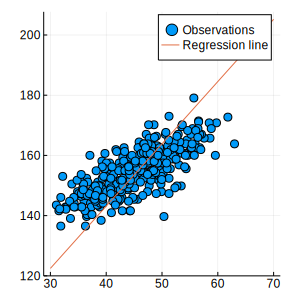

In [7]:
xi = 30.0:0.1:70.0
yi = mean(chn[:alpha]) .+ mean(chn[:beta])*xi

scatter(x, y, lab="Observations")
plot!(xi, yi, lab="Regression line")

##-

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*